# Insights into Retail Dynamics

## Project Overview:
**Insights into Retail Dynamics** is a comprehensive analysis project designed to unlock valuable insights from a detailed retail dataset. This project delves into various facets of the retail company's operations, encompassing sales trends, product dynamics, customer behavior, and geographical influences. By employing advanced analytical techniques and visualization tools, **Insights into Retail Dynamics** aims to provide actionable recommendations to enhance decision-making processes and optimize the overall performance of the retail business.

## Objectives:

### Sales Analysis:
1. Understand overall sales trends over the months and years.
2. Analyze variations in sales, quantity, and profit by order date and year. 
3. Identify seasonal patterns or trends in order priority.
4. Examine the correlation between the discount rate and sales/profit.

### Product Analysis:
1. Identify products with the highest sales.
2. Understand product distribution across different categories and subcategories.
3. Investigate product category contribution to average profit.
4. Identify products or categories more sensitive to discounts.

### Customer Analysis:
1. Recognize repeat customers and evaluate their contribution to sales.
2. Analyze the contribution of different customer segments to sales and profit.
3. Identify specific products or categories preferred by certain customer segments.
4. Calculate the average order quantity and profit per customer.

### Geographical Analysis:
1. Determine countries and states contributing the most to sales.
2. Determine markets and regions contributing the most to sales.
3. Assess how market and region characteristics influence sales and profit.
4. Explore regional variations in order priority or shipping modes.


The **Insights into Retail Dynamics** project aims to provide actionable insights, enabling the retail company to make informed decisions that drive efficiency, enhance customer satisfaction, and ultimately improve business outcomes.

## Analyst Information:

**Project Analyst:** Zeinab Elrashied Hassan Mohammed

**LinkedIn Profile:** www.linkedin.com/in/zeinabelrashied

**Email:** [zeinabalrashiedhassan@gmail.com](mailto:zeinabalrashiedhassan@gmail.com)

Feel free to connect for further discussions or collaborations.


_________________________________________________________________

**IMPORTING LIBRARIES**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

**LOAD THE DATASET**

In [2]:
data = pd.read_excel("RetailCompanyDataset.xlsx")

### **DATA CLEANING:**

In [3]:
# Display The First 5 rows
data.head()

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,AG-2011-2040,2011-01-01,2011-01-06,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium,2011
1,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium,2011
2,HU-2011-1220,2011-01-01,2011-01-05,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High,2011
3,IT-2011-3647632,2011-01-01,2011-01-05,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High,2011
4,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium,2011


In [4]:
# The shape of the dataset
data.shape

(51290, 21)

In [5]:
# Presenting columns of the dataset
data.columns

Index(['order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_name',
       'segment', 'state', 'country', 'market', 'region', 'product_id',
       'category', 'sub_category', 'product_name', 'sales', 'quantity',
       'discount', 'profit', 'shipping_cost', 'order_priority', 'year'],
      dtype='object')

In [6]:
# Checking null values
data.isna().sum()

order_id          0
order_date        0
ship_date         0
ship_mode         0
customer_name     0
segment           0
state             0
country           0
market            0
region            0
product_id        0
category          0
sub_category      0
product_name      0
sales             0
quantity          0
discount          0
profit            0
shipping_cost     0
order_priority    0
year              0
dtype: int64

In [7]:
# Checking duplicate values
data.duplicated().sum()

0

In [8]:
# A concise summary of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_id        51290 non-null  object        
 1   order_date      51290 non-null  datetime64[ns]
 2   ship_date       51290 non-null  datetime64[ns]
 3   ship_mode       51290 non-null  object        
 4   customer_name   51290 non-null  object        
 5   segment         51290 non-null  object        
 6   state           51290 non-null  object        
 7   country         51290 non-null  object        
 8   market          51290 non-null  object        
 9   region          51290 non-null  object        
 10  product_id      51290 non-null  object        
 11  category        51290 non-null  object        
 12  sub_category    51290 non-null  object        
 13  product_name    51290 non-null  object        
 14  sales           51290 non-null  float64       
 15  qu

In [9]:
# convert the "year" column in the DataFrame to a datetime format
data["year"] = pd.to_datetime(data["year"], format="%Y").dt.year

In [10]:
# Getting a descriptive statistic summary
data.describe()

,sales,quantity,discount,profit,shipping_cost,year
count,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,246.490581,3.476545,0.142908,28.641740,26.375818,2012.777208
std,487.565361,2.278766,0.212280,174.424113,57.296810,1.098931
min,0.444000,1.000000,0.000000,-6599.978000,0.002000,2011.000000
25%,30.758625,2.000000,0.000000,0.000000,2.610000,2012.000000
50%,85.053000,3.000000,0.000000,9.240000,7.790000,2013.000000
75%,251.053200,5.000000,0.200000,36.810000,24.450000,2014.000000
max,22638.480000,14.000000,0.850000,8399.976000,933.570000,2014.000000


# Sales Analysis:

<h4>1. Overall Sales Trends Over the Months and Years:

**Overall Sales Trends Over the Years**

In [11]:
# Set the display format for float numbers
pd.options.display.float_format = "{:,.2f}".format

# Group by year and sum the sales
yearly_sales = pd.DataFrame(data.groupby("year").sum()["sales"]).reset_index()

#Display the result
yearly_sales

,year,sales
0,2011,"2,259,450.90"
1,2012,"2,677,438.69"
2,2013,"3,405,746.45"
3,2014,"4,299,865.87"


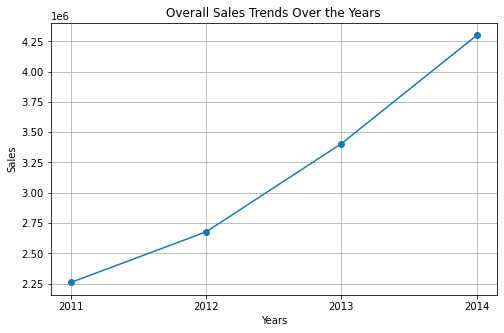

In [12]:
# Convert "sales" column to numeric format
yearly_sales["sales"] = yearly_sales["sales"].replace(",", "", regex=True).astype(float)

# Plotting the data

plt.figure(figsize=(8,5))

plt.plot(yearly_sales["year"], yearly_sales["sales"], marker='o', linestyle='-')
plt.xlabel("Years")
plt.ylabel("Sales")
plt.title("Overall Sales Trends Over the Years")


# Format x-axis ticks to match the numbers in the "year" column
plt.xticks(yearly_sales["year"])

plt.grid(True)
plt.show()

>**Conclusion:** The sales data demonstrates a consistent upward trend from 2011 to 2014, reflecting substantial revenue growth.
Starting at \\$2.26 million in 2011, sales increased annually, reaching \\$4.30 million in 2014. This positive trajectory suggests effective business strategies and potential market expansion, highlighting the company's success in generating increased revenue over the four-year period.

**Overall Sales Trends Over the Months and Years**

In [13]:
# Creating month column from Order Date column
data["month"] = data["order_date"].apply(lambda x: x.strftime("%m"))

In [14]:
# Group by month and sum the sales
monthly_sales = pd.DataFrame(data.groupby(["month", "year"]).sum()["sales"])

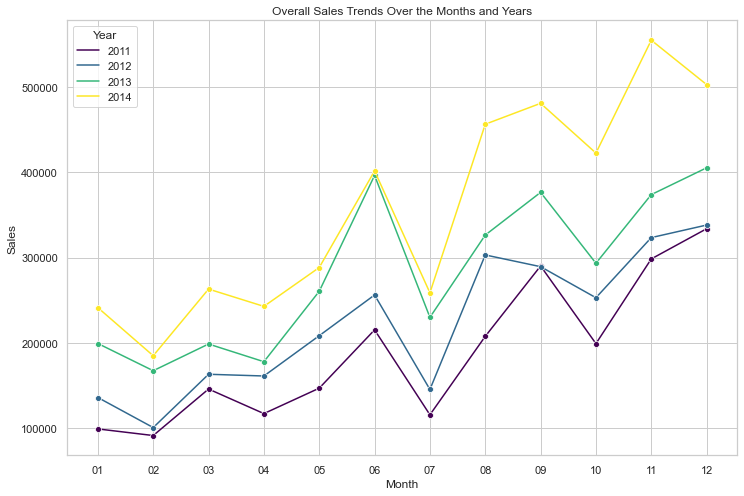

In [15]:
# Reset the index
monthly_sales.reset_index(inplace=True)

sns.set(style="whitegrid")

# Plotting the data
plt.figure(figsize=(12, 8))
sns.lineplot(x="month", y="sales", hue="year", data=monthly_sales, marker="o", palette="viridis")
plt.title("Overall Sales Trends Over the Months and Years")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.legend(title="Year")
plt.show()

>**Conclusion:** The monthly sales data reveals distinct trends for each year from 2011 to 2014. Here's a summary of the overall trends observed:
>
>**2011:**
>
>- Sales started the year at \$98,898.49 in January and steadily increased throughout the year.
>- The highest monthly sales were in December, reaching \$333,925.73.
>
>**2012:**
>
>- Sales began at \$135,780.72 in January, with a noticeable increase over the first few months.
>- Similar to 2011, December had the highest sales, totaling \$338,256.97.
>
>**2013:**
>
>- January sales were at \$199,185.91, showing a consistent upward trend.
>- The peak sales month was again December, reaching \$405,454.38.
>
>**2014:**
>
>- January started with \$241,268.56 in sales, and the trend continued upward.
>- December marked the highest monthly sales for the year, reaching \$503,143.69.
>
>In general, each year exhibited a consistent pattern of increasing sales throughout the months, with December consistently standing out as the month with the highest sales. The overall trend suggests positive growth in sales over the observed years.

<h4>2. Analyze variations in sales, quantity, and profit by Year and Month

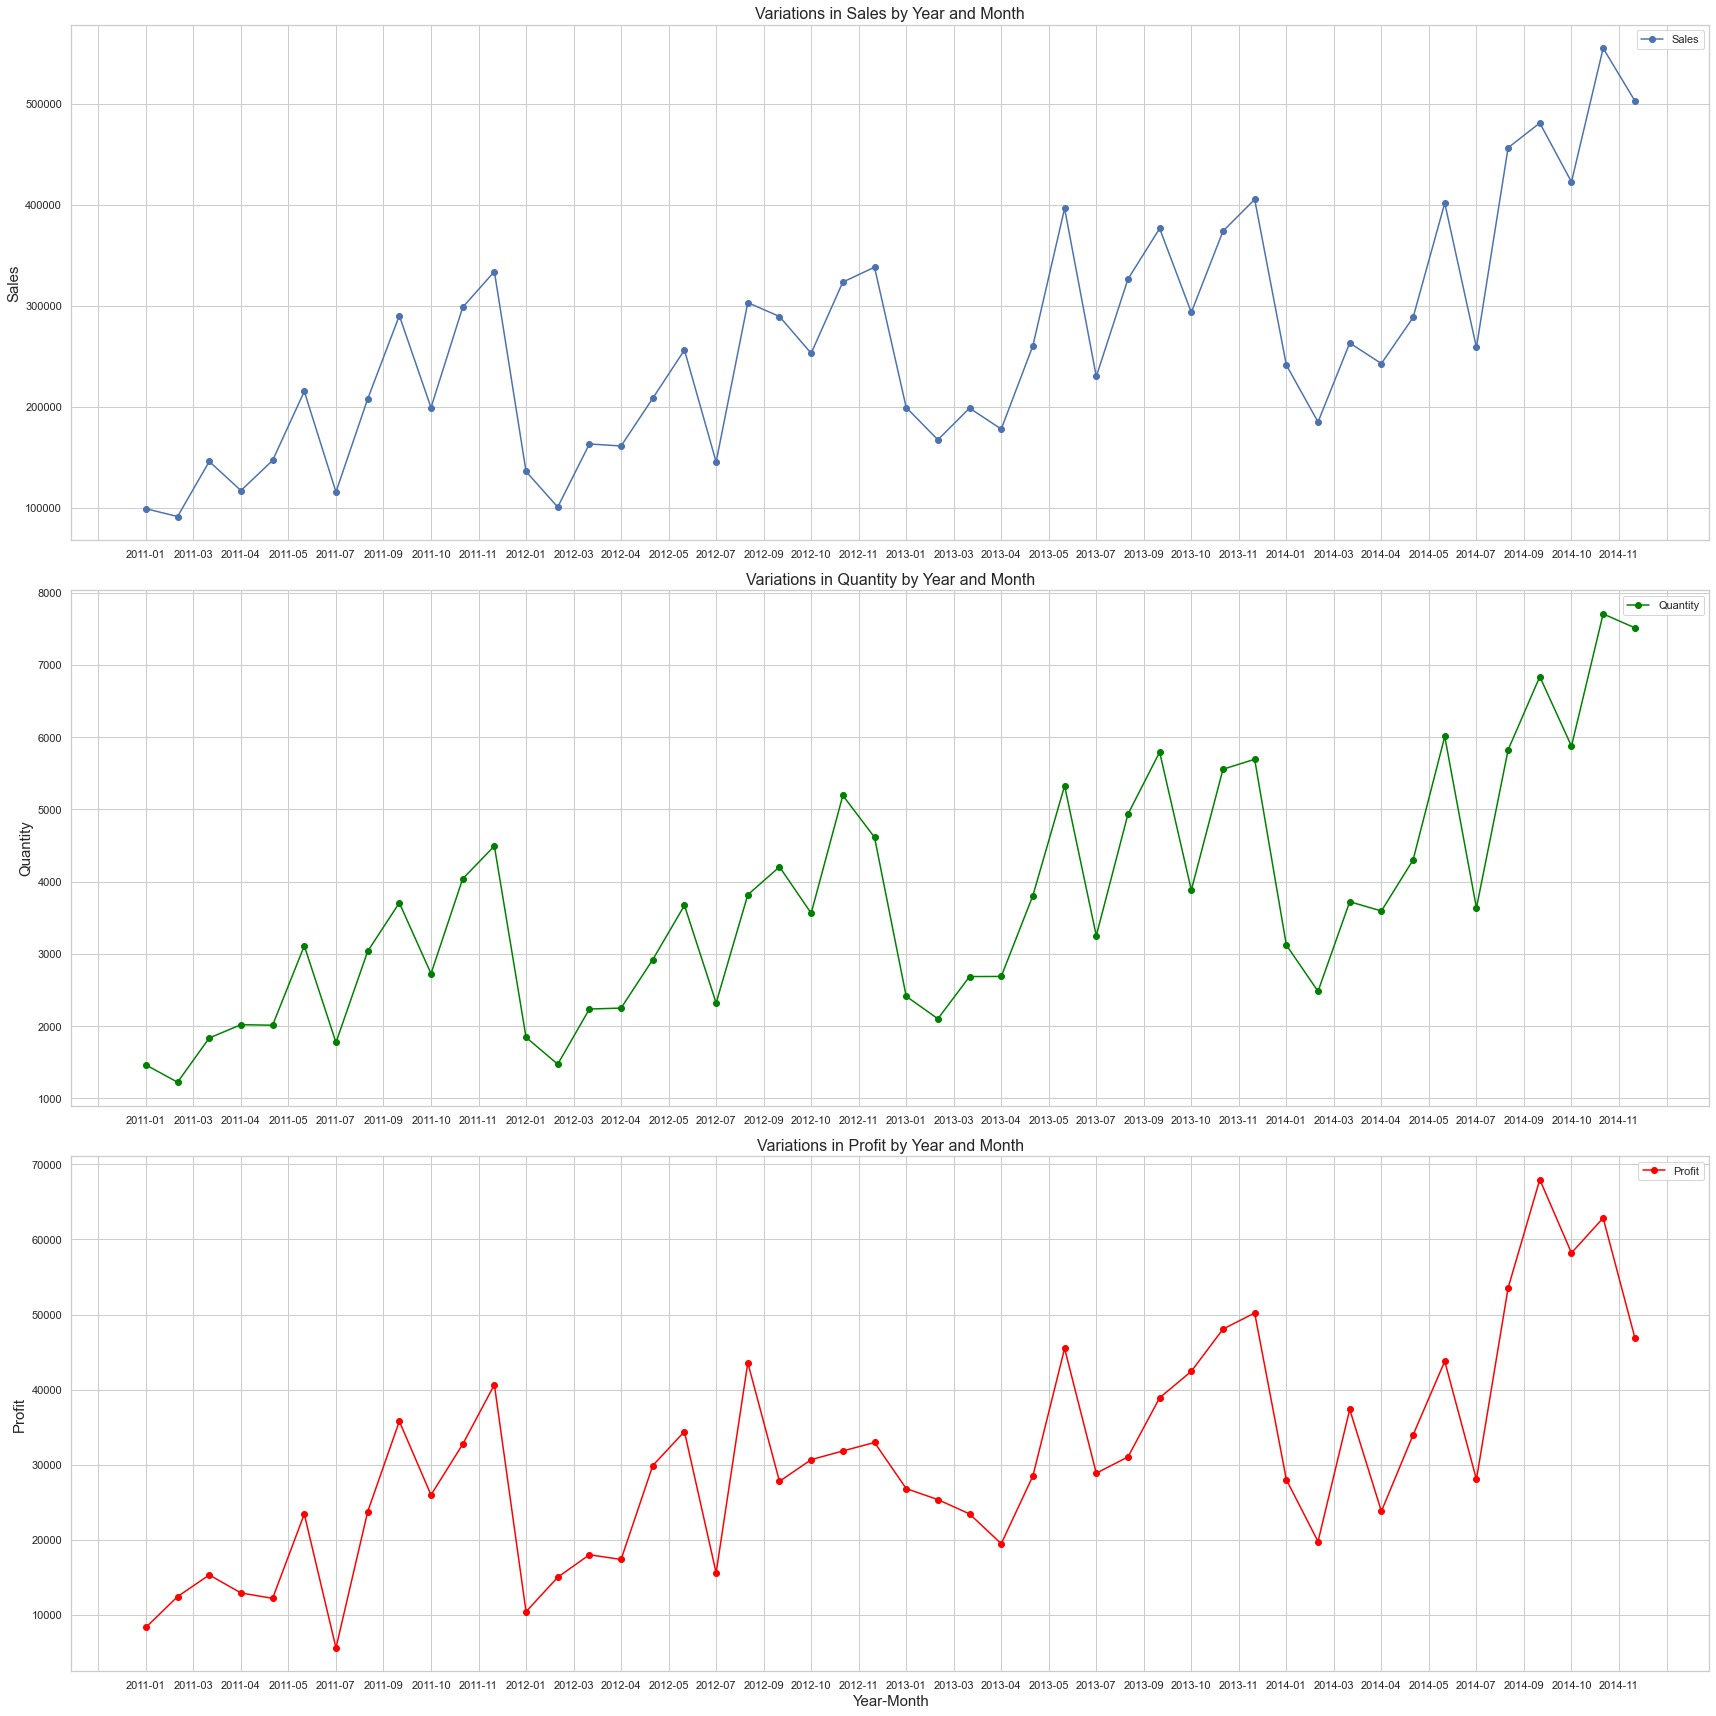

In [43]:
# Group by "year" and "order_date" and sum sales, quantity, and profit
variations_by_month = data.groupby(["year", "month"]).sum()[["sales", "quantity", "profit"]].reset_index()

# Plot variations in sales, quantity, and profit over time
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(24, 24))


# Sales variation
axes[0].plot(variations_by_month["year"].astype(str) + "-" + variations_by_month["month"].astype(str), variations_by_month["sales"], marker="o", label="Sales")
axes[0].set_title("Variations in Sales by Year and Month", fontsize=16)
axes[0].set_ylabel("Sales", fontsize=15)
axes[0].legend()
axes[0].xaxis.set_major_locator(plt.MaxNLocator(nbins=40)) 

# Quantity variation
axes[1].plot(variations_by_month["year"].astype(str) + "-" + variations_by_month["month"].astype(str), variations_by_month["quantity"], marker="o", label="Quantity", color="green")
axes[1].set_title("Variations in Quantity by Year and Month", fontsize=16)
axes[1].set_ylabel("Quantity", fontsize=15)
axes[1].legend()
axes[1].xaxis.set_major_locator(plt.MaxNLocator(nbins=40))

# Profit variation
axes[2].plot(variations_by_month["year"].astype(str) + "-" + variations_by_month["month"].astype(str), variations_by_month["profit"], marker="o", label="Profit", color="red")
axes[2].set_title("Variations in Profit by Year and Month", fontsize=16)
axes[2].set_xlabel("Year-Month", fontsize=15)
axes[2].set_ylabel("Profit", fontsize=15)
axes[2].legend()
axes[2].xaxis.set_major_locator(plt.MaxNLocator(nbins=40))

plt.tight_layout()
plt.show()

>**Conclusion:**
>The analysis provides insights into the monthly trends for sales, profits, and quantities over the observed years (2011 to 2014).

>**Sales Variation:**
>- Overall, the sales data reveals a consistent upward trend in each month across the years.
>- Sales started at \\$98,898.49 in January 2011 and steadily increased, reaching the highest point of \\$503,143.69 in December 2014.
>- Each subsequent year showed a similar pattern of growth, with December consistently being the month with the highest sales.

>**Profit Variation:**
>- Profits demonstrate a positive trend similar to sales, indicating a strong correlation between sales and profitability.
>- Profit values increased steadily each year, with December consistently having the highest profit across all years.
>- The highest profit was observed in December 2014, amounting to \\$67,979.45.

>**Quantity Variation:**
>- Quantity data shows a continuous growth pattern in each month across the years.
>- The quantity of products sold increased steadily, with December 2014 having the highest quantity of 7,513 units.
>- Similar to sales and profits, December consistently exhibited the highest quantities sold.

>**Overall Insights:**
>- The synchronization in the upward trends of sales, profits, and quantities suggests a robust and successful business model.
>- The consistently strong performance in December across all metrics may be indicative of seasonality or promotional activities >during that month.
>- Understanding these trends can aid in strategic decision-making, such as optimizing inventory, marketing efforts, and >resource allocation to capitalize on peak periods.

>In summary, the observed data suggests positive and consistent growth in sales, profits, and quantities over the four-year period, with December consistently standing out as a pivotal month.

<h4>3. Identify seasonal patterns or trends in order priority

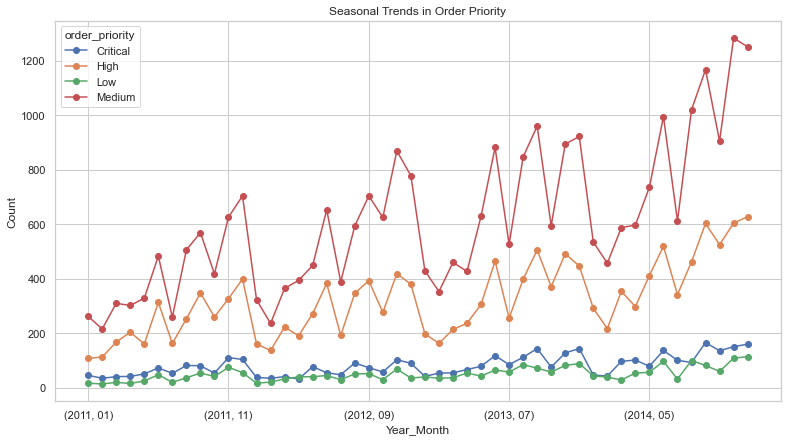

In [17]:
# Group by month and order priority, count the occurrences, and unstack for better visualization
order_priority_seasonal = data.groupby(["year", "month", "order_priority"]).size().unstack()

# Plot the seasonal trends
order_priority_seasonal.plot(kind="line", marker="o", figsize=(13, 7))
plt.title("Seasonal Trends in Order Priority")
plt.xlabel("Year_Month")
plt.ylabel("Count")

plt.show()

>**Conclusion:**
The data reveals seasonal trends in order priorities over the years 2011 to 2014. Notably, there is a consistent increase in orders during mid-year, particularly from June to August. Both "Critical" and "High" priority orders peak during these summer months, while "Low" and "Medium" priorities remain relatively stable with occasional fluctuations. Additionally, there is a consistent rise in order quantities across all priorities during the year-end months, particularly in November and December. This suggests a cyclic pattern in ordering behavior, emphasizing the importance of adapting inventory and operational strategies to these seasonal fluctuations.

<h4>4. Correlation Between Discount Rate and Sales/Profit

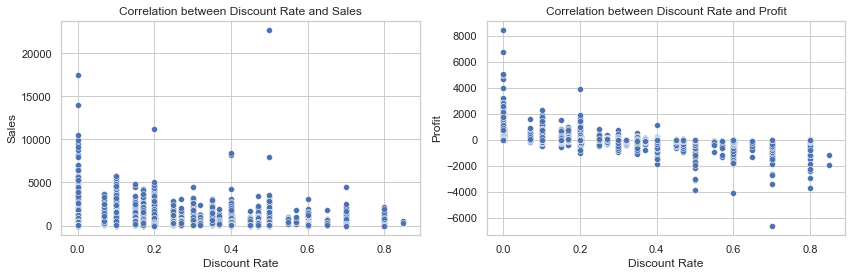

In [19]:
# Create subplots with 1 row and 2 columns
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# Scatter plot 1 - Correlation between Discount Rate and Sales
sns.scatterplot(x="discount", y="sales", data=data, ax=axs[0])
axs[0].set_xlabel("Discount Rate")
axs[0].set_ylabel("Sales")
axs[0].set_title("Correlation between Discount Rate and Sales")

# Scatter plot 2 - Correlation between Discount Rate and Profit
sns.scatterplot(x="discount", y="profit", data=data, ax=axs[1])
axs[1].set_xlabel("Discount Rate")
axs[1].set_ylabel("Profit")
axs[1].set_title("Correlation between Discount Rate and Profit")

# Adjust layout to prevent clipping of titles and labels
plt.tight_layout()

# Show the plots
plt.show()

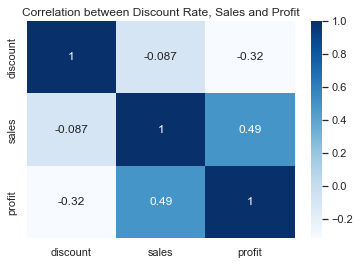

In [20]:
# Calculate the correlation matrix between discount rate, sales, and profit
discount_sales_profit_corr = data[["discount", "sales", "profit"]].corr()

# Heatmap to visualize the correlation matrix
sns.heatmap(data=discount_sales_profit_corr, annot=True, cmap="Blues")
plt.title("Correlation between Discount Rate, Sales and Profit")
plt.show()

>**Conclusion:**The correlation analysis indicates that there is a weak negative correlation between the discount rate and sales, suggesting a subtle decrease in sales with higher discounts. Conversely, a moderate positive correlation between sales and profits suggests that higher sales are generally associated with increased profits. However, a moderate negative correlation between the discount rate and profit implies that higher discount rates may be linked to lower profitability. This underscores the importance of carefully managing discount strategies to balance the goal of driving sales with maintaining healthy profit margins.

# Product Analysis

<h4>1. Products with the Highest Sales

In [21]:
# Group the data by "product_name", calculate the total sales for each product,
top_products = pd.DataFrame(data.groupby("product_name").sum()["sales"]).sort_values("sales", ascending=False).reset_index()

# Select the top 10 products by sales
top_products = top_products[:10]

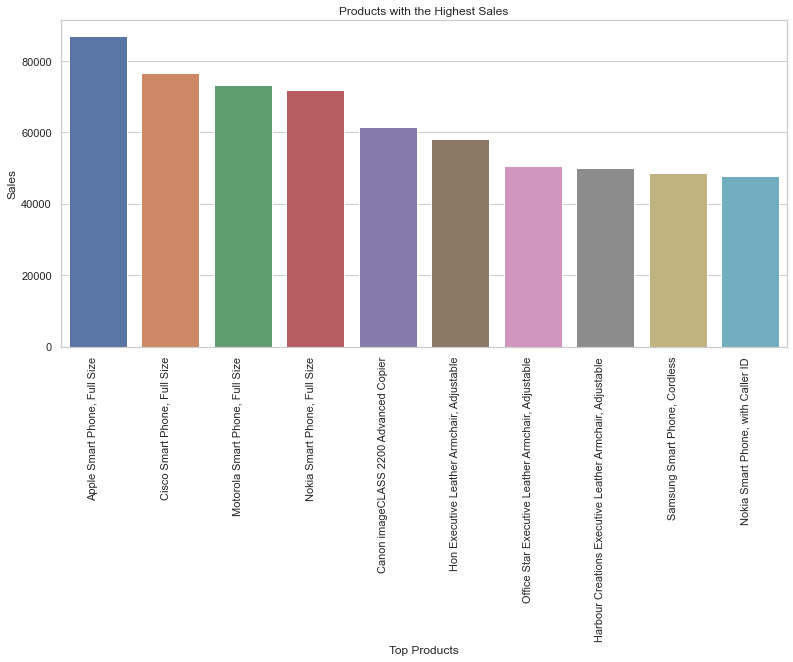

In [22]:
# Plotting the dataset
plt.figure(figsize=(13,6))

sns.barplot(data = top_products, x = top_products["product_name"], y = top_products["sales"])
plt.xlabel("Top Products")
plt.ylabel("Sales")
plt.title("Products with the Highest Sales")
plt.xticks(rotation="vertical", ha="right")
plt.show()

<h4>2. Product Distribution Across Categories and Subcategories

In [44]:
prod_dis_cat_subcat = pd.DataFrame(data.groupby(["category", "sub_category"]).size()).rename(columns={0: "count"})
prod_dis_cat_subcat

count
category        sub_category       
Furniture       Bookcases      2411
                Chairs         3434
                Furnishings    3170
                Tables          861
Office Supplies Appliances     1755
                Art            4883
                Binders        6152
                Envelopes      2435
                Fasteners      2420
                Labels         2606
                Paper          3538
                Storage        5059
                Supplies       2425
Technology      Accessories    3075
                Copiers        2223
                Machines       1486
                Phones         3357

<Figure size 1080x504 with 0 Axes>

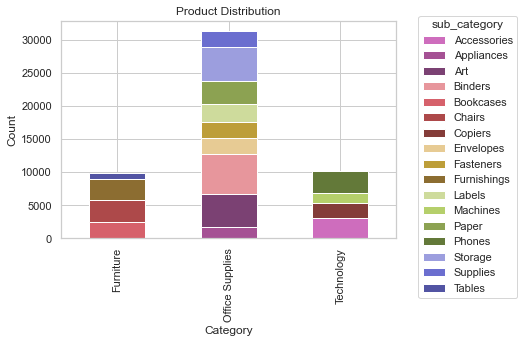

In [24]:
# Calculate the distribution of products across categories and subcategories
category_subcategory_distribution = data.groupby(["category", "sub_category"]).size().unstack().fillna(0)

# Define a custom color palette with 17 distinct colors
custom_palette = sns.color_palette("tab20b_r", n_colors=17)

# Create a stacked bar plot with the custom color palette
plt.figure(figsize=(15, 7))
category_subcategory_distribution.plot(kind='bar', stacked=True, color=custom_palette)
plt.xlabel("Category")
plt.ylabel("Count")
plt.title("Product Distribution")
plt.legend(title="sub_category", bbox_to_anchor=(1.05, 1.05), loc="upper left")

plt.show()

>**Conclusion:**The Product Distribution Across Categories and Subcategories highlights the varying sizes of product categories. In the Furniture category, Chairs and Furnishings stand out with 3,434 and 3,170 pieces, respectively, indicating a significant demand for these items. Bookcases also contribute notably with 2,411 pieces. In the Office Supplies category, Binders and Storage are the dominant subcategories, each surpassing 5,000 pieces, suggesting a high demand for organizational products. Within Technology, Accessories and Phones are the leading subcategories with 3,075 and 3,357 pieces, respectively. This distribution analysis provides valuable insights into the popularity of different products, aiding in inventory management and strategic decision-making.

<h4>3. # Investigate Product Category Contribution to Average Profit

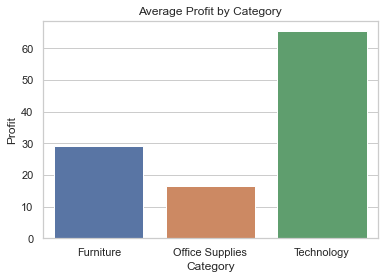

In [25]:
# Investigate Product Category Contribution to Average Profit
category_profit_margin = data.groupby("category").mean()["profit"]
sns.barplot(x=category_profit_margin.index, y=category_profit_margin.values)
plt.xlabel("Category")
plt.ylabel("Profit")
plt.title("Average Profit by Category")

plt.show()

>**Conclusion:**Upon investigating the product category contribution to average profit, it is evident that Technology products lead with an average profit of \\$65.45, significantly outperforming Furniture with \\$29.04 and Office Supplies with \\$16.58. This suggests that the Technology category plays a substantial role in driving higher average profits compared to the other categories.

<h4>4. Sensitivity of Certain Products or Categories to Discounts

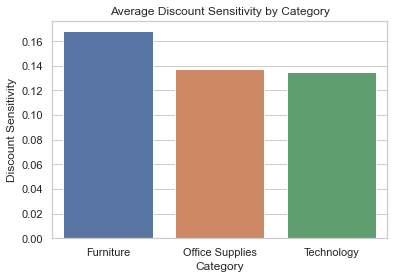

In [26]:
# Calculate the average discount sensitivity for each product category
category_discount_sensitivity = data.groupby("category").mean()["discount"]

# Create a bar plot to visualize average discount sensitivity by category
sns.barplot(x=category_discount_sensitivity.index, y=category_discount_sensitivity.values)
plt.xlabel("Category")
plt.ylabel("Discount Sensitivity")
plt.title("Average Discount Sensitivity by Category")

plt.show()

>**Conclusion:**The analysis reveals the sensitivity of product categories to discounts, with Furniture exhibiting an average discount of 0.17, indicating a relatively higher sensitivity to discounts. Meanwhile, both Office Supplies and Technology show similar average discount values of 0.14, suggesting comparable levels of discount influence across these categories.

# Customer Analysis

<h4>1. Recognize repeat customers and evaluate their contribution to sales

**Recognize repeat customers:**

In [27]:
# Identify repeat customers
repeat_customers = pd.DataFrame(data.groupby("customer_name").size().sort_values(ascending=False)).reset_index().rename(columns={0: "count"})

# Display the top 10 repeat customers
print("Top 10 Customers:")
repeat_customers[:10]

Top 10 Customers:


,customer_name,count
0,Muhammed Yedwab,108
1,Steven Ward,106
2,Gary Hwang,102
3,Patrick O'Brill,102
4,Bill Eplett,102
5,Harry Greene,101
6,Eric Murdock,100
7,Art Ferguson,98
8,Brosina Hoffman,97
9,Bart Watters,96


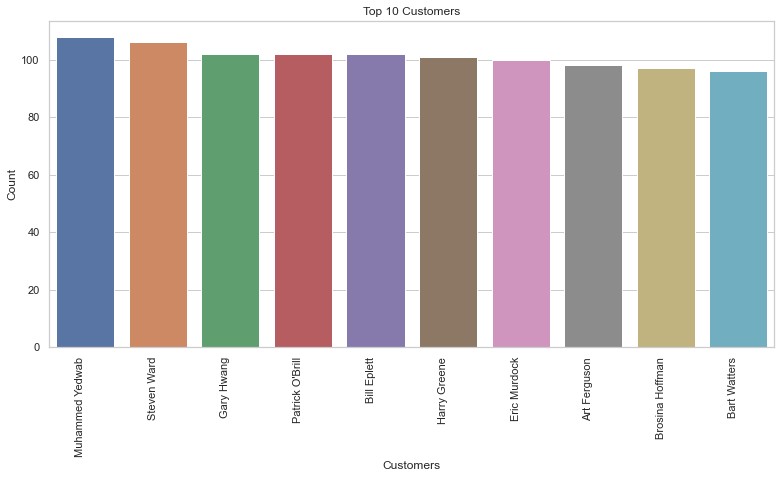

In [28]:
# Plotting
plt.figure(figsize=(13,6))

sns.barplot(data = repeat_customers[:10], x = "customer_name", y = "count")
plt.xlabel("Customers")
plt.ylabel("Count")
plt.title("Top 10 Customers")
plt.xticks(rotation="vertical", ha="right")
plt.show()


**Contribution of Repeat Customers to Sales:**

In [29]:
# Evaluate their contribution to sales
repeat_customers_sales = data.groupby("customer_name").sum()["sales"].sort_values(ascending=False)
repeat_customers_sales_percentage = (repeat_customers_sales / data["sales"].sum()) * 100
repeat_customers_sales_percentage = pd.DataFrame(repeat_customers_sales_percentage).reset_index()

# Display the contribution of repeat customers to total sales
print("\nContribution of Repeat Customers to Total Sales:")
repeat_customers_sales_percentage[:10]


Contribution of Repeat Customers to Total Sales:


,customer_name,sales
0,Tom Ashbrook,0.32
1,Tamara Chand,0.30
2,Greg Tran,0.28
3,Christopher Conant,0.28
4,Sean Miller,0.28
5,Bart Watters,0.26
6,Natalie Fritzler,0.25
7,Fred Hopkins,0.24
8,Jane Waco,0.24
9,Hunter Lopez,0.24


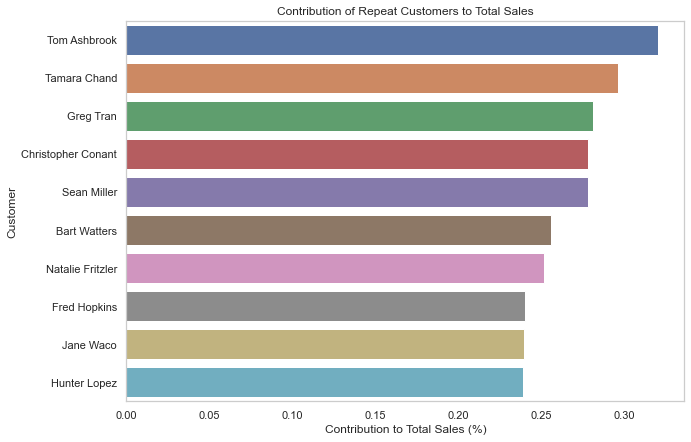

In [30]:
# Visualize the contribution of repeat customers
plt.figure(figsize=(10,7))

# Select the top 10 repeat customers by sales percentage
top_customers_sales_percentage = repeat_customers_sales_percentage[:10]

# Create a horizontal bar plot to show the contribution of repeat customers to total sales
sns.barplot(y=top_customers_sales_percentage["customer_name"], x=top_customers_sales_percentage["sales"], orient="h")
plt.xlabel("Contribution to Total Sales (%)")
plt.ylabel("Customer")
plt.title("Contribution of Repeat Customers to Total Sales")
plt.grid(False)

# Display the horizontal bar plot
plt.show()

>**Conclusion:**
Repeat customers play a crucial role in total sales, with Tom Ashbrook and Tamara Chand leading at around 32% and 30%, respectively. Other customers like Greg Tran, Christopher Conant, and Sean Miller contribute approximately 28%, underscoring their significant impact on overall sales.

<h4>2. Contribution of Different Customer Segments to Sales and Profit

In [31]:
# Group by "segment" and calculate the sum of "sales" and "profit" for each segment
segment_sales_profit = data.groupby("segment").sum()[["sales", "profit"]]
segment_sales_profit

,sales,profit
segment,,
Consumer,"6,507,949.42","749,239.78"
Corporate,"3,824,697.52","442,785.86"
Home Office,"2,309,854.97","277,009.18"


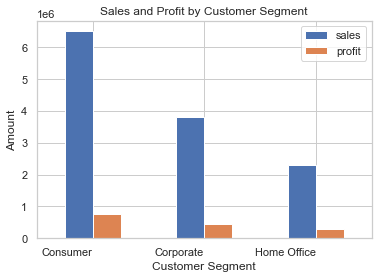

In [32]:
# Plotting
segment_sales_profit.plot(kind = "bar")
plt.xlabel("Customer Segment")
plt.ylabel("Amount")
plt.title("Sales and Profit by Customer Segment")
plt.xticks(rotation="horizontal", ha="right")

plt.show()

>**Conclusion:** The Consumer segment leads with sales totaling \\$6,507,949.42 and profits of \\$749,239.78. Following closely, the Corporate segment contributes \\$3,824,697.52 in sales and \\$442,785.86 in profits. Meanwhile, the Home Office segment adds to the overall performance with sales of \\$2,309,854.97 and profits amounting to \\$277,009.18. This data highlights the importance of understanding and catering to diverse customer segments for a well-rounded business strategy.

<h4>3. Preference of Specific Products or Categories by Customer Segments

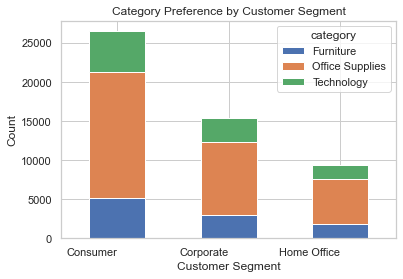

In [33]:
# Group by both "segment" and "category", count occurrences, and reshape the result into a stacked bar plot
segment_preference = data.groupby(["segment", "category"]).size().unstack().fillna(0)
segment_preference.plot(kind="bar", stacked=True)
plt.xlabel("Customer Segment")
plt.ylabel("Count")
plt.title("Category Preference by Customer Segment")
plt.xticks(rotation="horizontal", ha="right")

plt.show()

>**Conclusion:** In the Consumer segment, Office Supplies stand out as the most preferred category with a substantial count of 16,151, followed by Technology at 5,272 and Furniture at 5,095. Corporate customers also show a preference for Office Supplies, with a count of 9,364, followed by Technology at 3,051 and Furniture at 3,014. In the Home Office segment, the pattern is similar, with a significant preference for Office Supplies (5,758), followed by Technology (1,818) and Furniture (1,767). Understanding these preferences allows businesses to tailor their offerings to each customer segment effectively.

<h4>4. Calculate the average order quantity and profit per customer

In [34]:
# Calculate Average Order Quantity and Profit per Customer
average_order_quantity = data["quantity"].mean()
average_profit_per_customer = data["profit"].mean()

print(f"Average Order Quantity per Customer: {average_order_quantity:.0f}")
print(f"Average Profit per Customer: ${average_profit_per_customer:.2f}")


Average Order Quantity per Customer: 3
Average Profit per Customer: $28.64


# Geographical Analysis

<h4>1. Determine Countries and States Contributing the Most to Sales

In [35]:
# Group by "country", calculate the total sales for each country, select the top 10
top_countries = pd.DataFrame(data.groupby("country").sum()["sales"].nlargest(10)).sort_values("sales", ascending=False)

# Display the top 10 countries by sales
print("Top 10 Countries by Sales:")
top_countries

Top 10 Countries by Sales:


,sales
country,
United States,"2,297,200.86"
Australia,"925,235.85"
France,"858,931.08"
China,"700,562.03"
Germany,"628,840.03"
Mexico,"622,590.62"
India,"589,650.10"
United Kingdom,"528,576.30"
Indonesia,"404,887.50"


In [36]:
# Group by "state", calculate the total sales for each state, select the top 10
top_states = pd.DataFrame(data.groupby("state").sum()["sales"].nlargest(10))

# Display the top 10 states by sales
print("Top 10 States by Sales:")
top_states

Top 10 States by Sales:


,sales
state,
England,"485,170.97"
California,"457,687.63"
Ile-de-France,"317,822.54"
New York,"310,876.27"
New South Wales,"270,487.10"
Queensland,"238,312.73"
North Rhine-Westphalia,"216,451.85"
Texas,"170,188.05"
San Salvador,"153,639.40"


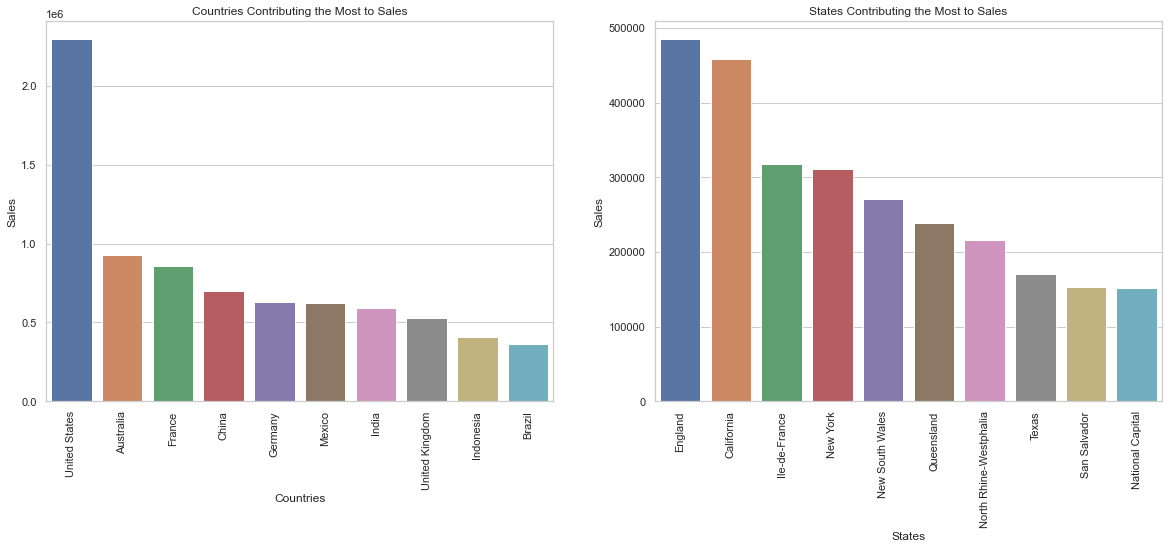

In [37]:
# Plotting
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 7))

top_countries = top_countries.reset_index()
top_states = top_states.reset_index()

# Plot for countries
sns.barplot(data=top_countries, x="country", y="sales", ax=axes[0])
axes[0].set_xlabel("Countries")
axes[0].set_ylabel("Sales")
axes[0].set_title("Countries Contributing the Most to Sales")
axes[0].tick_params(axis="x", rotation=90)

# Plot for states
sns.barplot(data=top_states, x="state", y="sales", ax=axes[1])
axes[1].set_xlabel("States")
axes[1].set_ylabel("Sales")
axes[1].set_title("States Contributing the Most to Sales")
axes[1].tick_params(axis="x", rotation=90)

plt.show()

In [38]:
# Calculate the total sales for each combination of country and state
state_country_sales = pd.DataFrame(data.groupby(["country", "state"])["sales"].sum().nlargest(10))

# Display the top 10 states/countries by sales
print("Top 10 States/Countries by Sales:")
state_country_sales

Top 10 States/Countries by Sales:


sales
country        state                            
United Kingdom England                485,170.97
United States  California             457,687.63
France         Ile-de-France          317,822.54
United States  New York               310,876.27
Australia      New South Wales        270,487.10
               Queensland             238,312.73
Germany        North Rhine-Westphalia 216,451.85
United States  Texas                  170,188.05
El Salvador    San Salvador           153,639.40
Australia      Victoria               151,785.03

<h4>2. Determine Market and Region Contributing the Most to Sales

In [39]:
# Calculate the total sales for each combination of market and region, then select the top 10
top_markets_regions = pd.DataFrame(data.groupby(["market", "region"])["sales"].sum().nlargest(10))

# Display the top 10 markets/regions by sales
print("Top 10 Markets/Regions by Sales:")
top_markets_regions

Top 10 Markets/Regions by Sales:


sales
market region                     
EU     Central        1,720,552.62
APAC   Oceania        1,100,184.61
       Southeast Asia   884,423.17
       North Asia       848,309.78
EMEA   EMEA             806,161.31
Africa Africa           783,773.21
APAC   Central Asia     752,826.57
US     West             725,457.82
       East             678,781.24
EU     North            625,574.98

<h4>3. Influence of Market and Region Characteristics on Sales and Profit

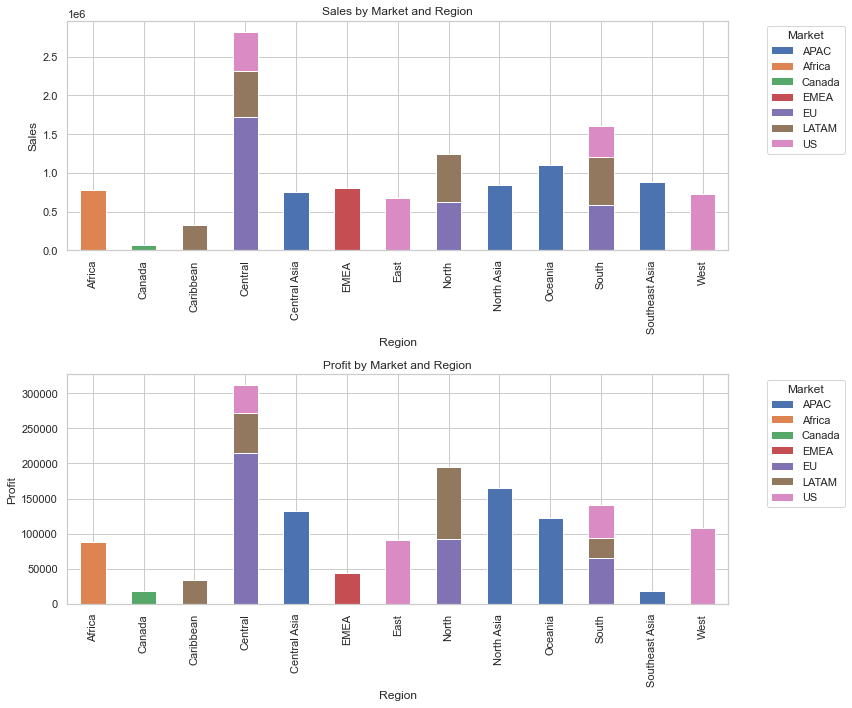

In [46]:
# Group by "market" and "region" and calculate the sum of sales and profit
market_region_sales_profit = data.groupby(["region", "market"]).sum().unstack()[["sales", "profit"]]

# Create subplots with two rows and one column
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 10))

# Sales subplot
market_region_sales_profit["sales"].plot(kind="bar", stacked=True, ax=axes[0])
axes[0].set_title("Sales by Market and Region")
axes[0].set_xlabel("Region")
axes[0].set_ylabel("Sales")
axes[0].legend(title="Market", bbox_to_anchor=(1.05, 1), loc="upper left")

# Profit subplot
market_region_sales_profit["profit"].plot(kind="bar", stacked=True, ax=axes[1])
axes[1].set_title("Profit by Market and Region")
axes[1].set_xlabel("Region")
axes[1].set_ylabel("Profit")
axes[1].legend(title="Market", bbox_to_anchor=(1.05, 1), loc="upper left")

# Adjust layout
plt.tight_layout()
plt.show()

>**Conclusion:**
Across various regions and markets, the sales and profit figures show distinct patterns. The European (EU) and Asia-Pacific (APAC) regions, including countries like Central, North Asia, Southeast Asia, and Oceania, demonstrate significant sales and profits, indicating strong market performance. Latin America (LATAM) also contributes notably to sales. In contrast, the US market displays substantial sales but comparatively lower profits. It's evident that the EU, APAC, and LATAM regions play crucial roles in driving overall sales and profit, showcasing diverse market dynamics. The performance in Africa and Canada appears modest compared to these larger markets.

<h4>4. Regional Variations in Order Priority and Shipping Mode

Regional Variations in Order Priority

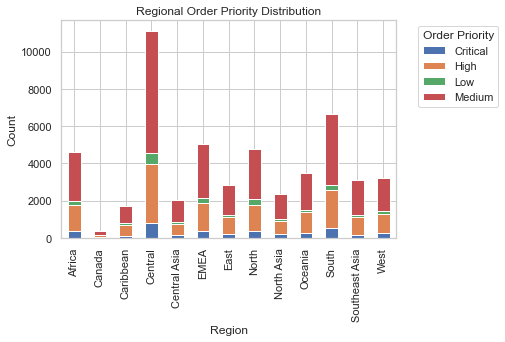

In [41]:
# Group by "region" and "order_priority" and calculate the count
region_order_priority = data.groupby(["region", "order_priority"]).size().unstack()
region_order_priority.plot(kind="bar", stacked=True)
plt.xlabel("Region")
plt.ylabel("Count")
plt.title("Regional Order Priority Distribution")
plt.legend(title="Order Priority", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

>**Conclusion:** The order priority distribution across different regions shows that the majority of orders fall into the "Medium" priority category, indicating a balanced and standard order processing for these regions. "High" and "Critical" priorities also have significant representation, suggesting a need for efficient and prompt handling of orders. "Low" priority orders are comparatively less frequent across regions, emphasizing a focus on timely processing and fulfillment for most orders.

Regional Variations in Shipping Mode

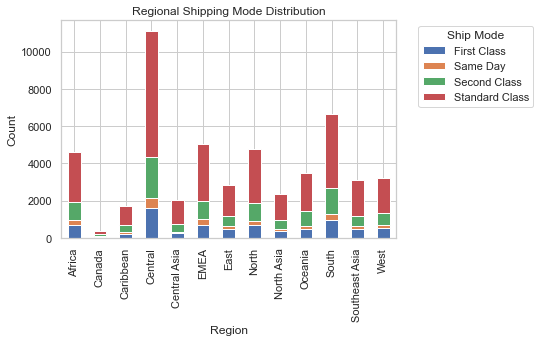

In [42]:
# Group by "region" and "order_priority" and calculate the count
region_shipping_modes = data.groupby(["region", "ship_mode"]).size().unstack()
region_shipping_modes.plot(kind="bar", stacked=True)
plt.xlabel("Region")
plt.ylabel("Count")
plt.title("Regional Shipping Mode Distribution")
plt.legend(title="Ship Mode", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

>**Conclusion:** The shipping mode distribution across different regions shows that the majority of orders are shipped using the "Standard Class" option, suggesting a common preference for a reliable and standard delivery method. Other shipping modes like "First Class," "Second Class," and "Same Day" are also utilized but to a lesser extent, indicating a diverse but generally balanced distribution of shipping preferences across regions. The prevalence of "Standard Class" as a preferred option implies a consistent and standard approach to shipping, contributing to a streamlined and efficient fulfillment process.